In [9]:
import pandas as pd
import igraph as ig
import numpy as np
import os
from pathlib import Path

In [4]:
dir = 'test_data'
subdir = 'scraped-15.28 26-10-2023'
edges = pd.read_csv(os.path.join(os.path.pardir, dir, subdir, 'edge_df.csv'), index_col=0)
vertices = pd.read_csv(os.path.join(os.path.pardir, dir, subdir,'vertex_df_icounts.csv')) # each row in vertices is unique

In [176]:
author_id = """
UCywTnrdto804wJcVFp50jRQ
"""
author_id = author_id.strip()
comments = edges[edges['author_id'] == author_id]['text'].values
print(len(comments))
for i, v in enumerate(comments):
    print(str(i+1)+". ", v, end='\n\n')

23
1.  living up to your username

2.  Weet ik niet maar ik neem aan dat die ouders meer van hun eigen kinderen houden dan jouw ouders van jouw aangezien je zo zit te janken en haten over niks

3.  Dankje, Gerrit-Jan van Delft. Niet alleen zet jij je volledige naam op het internet, maar nu weten ik en mijn generatie ook dat wanneer jij later zielig in een bejaardetehuis zit te rotten dat wij de stekker van de levensondersteunende machine van "Gerrit-Jan van Delft" maar eerder eruit mogen halen.

4.  Dat is helemaal niet erg om te zeggen hoor. Mannen en vrouwen bestaan zeker. Het is gewoon zo dat er biologisch, vanaf het geboorte, mogelijkheden zijn tot al meer dan alleen maar 2 seksen. Je hebt bijvoorbeeld intersex en Klinefelter. Dit zijn beide condities waarmee je geboren kan worden, staat dus helemaal los van LGBT.

5.  als iemand naar een school gaat ben je legaal een student, ja

6.  Ja inderdaad he? Ik zie zoveel mensen met exact de mening als jou, jij loopt echt met ALLES mee. I

In [129]:
edges['text'][edges['text'].str.contains('slagroom')]

comment_id
UgzhWpv2tfDxOpOLw6l4AaABAg    Je hebt hagelslag,slagroom en slachtafval.Meer...
Name: text, dtype: object

<Axes: xlabel='interactions_send', ylabel='Count'>

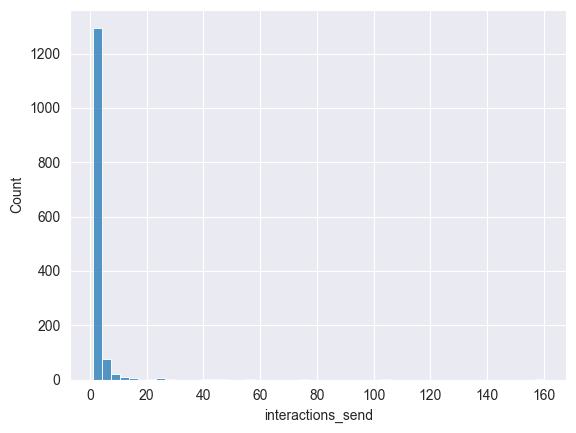

In [66]:
import seaborn as sns
vertices['interactions_send'].sort_values(ascending=False).head()

sns.histplot(vertices['interactions_send'], bins=50)

In [ ]:
edges[['video_id', '']].groupby('video_id')

In [4]:
edges[~edges['dest_id'].isna()].head(10)

array(['1pWjP9QNLcg', 'gUryIVhXHoc', 'XQjBYdoiirE', 'KDnSeLGnZYI',
       'VfWUbQfzYTg'], dtype=object)

In [14]:
edges_with_destination = edges[(edges['dest'].notna()) & (edges['kind'] != 'youtube#commentThread')]
print(edges_with_destination.shape)
edges_with_destination.head()

,threath_id,time,kind,author_id,dest_scraped,likes,num_replies,text,video_id,dest_id
comment_id,,,,,,,,,,
Ugx3EjEUzELcXnsK31N4AaABAg.9sX97TmU1WT9sZYrN-tkSX,Ugx3EjEUzELcXnsK31N4AaABAg,2023-07-24T21:02:34Z,youtube#comment,UCC35EnAeuy4lLGTjIQHuLTQ,ChristenDOM? helemaal,1,NaN,@ChristenDOM? helemaal mee eens!,1pWjP9QNLcg,UCOtHqJeZ2OG0FrJRUOwaieg
Ugx3EjEUzELcXnsK31N4AaABAg.9sX97TmU1WT9suqvucIUih,Ugx3EjEUzELcXnsK31N4AaABAg,2023-08-02T12:52:30Z,youtube#comment,UCEngHxSN_kcZYoavVA4i7Ow,ChristenDOM?Christendom is,0,NaN,​​@ChristenDOM?Christendom is een joodse sect ...,1pWjP9QNLcg,UCOtHqJeZ2OG0FrJRUOwaieg
UgyEkmq44td6yWcDbmp4AaABAg.9sWKNWsWV679sWvdXCgzpQ,UgyEkmq44td6yWcDbmp4AaABAg,2023-07-23T20:32:40Z,youtube#comment,UCk7p83NSuNlDbT3eArf67Yw,Alf Brans,0,NaN,@Alf Brans alias de prutspapegaai,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A
UgyEkmq44td6yWcDbmp4AaABAg.9sWKNWsWV679sZKcPATFx-,UgyEkmq44td6yWcDbmp4AaABAg,2023-07-24T18:58:11Z,youtube#comment,UCOtHqJeZ2OG0FrJRUOwaieg,Alf Brans,0,NaN,@Alf Brans ok,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A
Ugz5eerHs-tU206lvrp4AaABAg.9sW6TWAFi3I9snQNMCIhs5,Ugz5eerHs-tU206lvrp4AaABAg,2023-07-30T15:37:02Z,youtube#comment,UCFPb9eToj2c4JlktoX6Ki5A,Alf Brans,1,NaN,@Alf Brans Beide dragen toch een onderbroek of...,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A
Ugx7bD2DQV22B-sXeu54AaABAg.9sVG7nn6f-r9sWFxCy95Ng,Ugx7bD2DQV22B-sXeu54AaABAg,2023-07-23T14:19:37Z,youtube#comment,UCEngHxSN_kcZYoavVA4i7Ow,Alf BransEric,0,NaN,​@Alf BransEric is intelligenter dan jij bent....,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A
UgxUGxrx3mXmH-8xQbN4AaABAg.9sT8ac_y1Se9sTiuRbRwF5,UgxUGxrx3mXmH-8xQbN4AaABAg,2023-07-22T14:43:40Z,youtube#comment,UC1ffpT8ZDGqcGtd2WuaJlng,Alf Brans,0,NaN,@Alf Brans ?? waterkans(je) Dat er wat zinnigs...,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A
UgxUGxrx3mXmH-8xQbN4AaABAg.9sT8ac_y1Se9sWFev5VpOJ,UgxUGxrx3mXmH-8xQbN4AaABAg,2023-07-23T14:17:07Z,youtube#comment,UCEngHxSN_kcZYoavVA4i7Ow,Alf BransDoor,0,NaN,​@Alf BransDoor iedereen een prutser te noemen...,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A
Ugyb4U_Zxle7B7_Pkdx4AaABAg.9sT75A9kuON9sTjErgM4hb,Ugyb4U_Zxle7B7_Pkdx4AaABAg,2023-07-22T14:46:35Z,youtube#comment,UC1ffpT8ZDGqcGtd2WuaJlng,Alf Brans,1,NaN,@Alf Brans Is dat bij jou ook zo gebeurd ??,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A


In [25]:
edges_with_destination['from.To'] = edges_with_destination['author'] + '.' + edges_with_destination['dest'] # new column

(300, 12)


,Unnamed: 0,comment_id,threath_id,time,kind,author,dest,likes,num_replies,text,video_id,destId
78,79,Ugx3EjEUzELcXnsK31N4AaABAg.9sX97TmU1WT9sZYrN-tkSX,Ugx3EjEUzELcXnsK31N4AaABAg,2023-07-24T21:02:34Z,youtube#comment,UCC35EnAeuy4lLGTjIQHuLTQ,ChristenDOM? helemaal,1,NaN,@ChristenDOM? helemaal mee eens!,1pWjP9QNLcg,UCOtHqJeZ2OG0FrJRUOwaieg
79,80,Ugx3EjEUzELcXnsK31N4AaABAg.9sX97TmU1WT9suqvucIUih,Ugx3EjEUzELcXnsK31N4AaABAg,2023-08-02T12:52:30Z,youtube#comment,UCEngHxSN_kcZYoavVA4i7Ow,ChristenDOM?Christendom is,0,NaN,​​@ChristenDOM?Christendom is een joodse sect ...,1pWjP9QNLcg,UCOtHqJeZ2OG0FrJRUOwaieg
90,91,UgyEkmq44td6yWcDbmp4AaABAg.9sWKNWsWV679sWvdXCgzpQ,UgyEkmq44td6yWcDbmp4AaABAg,2023-07-23T20:32:40Z,youtube#comment,UCk7p83NSuNlDbT3eArf67Yw,Alf Brans,0,NaN,@Alf Brans alias de prutspapegaai,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A
91,92,UgyEkmq44td6yWcDbmp4AaABAg.9sWKNWsWV679sZKcPATFx-,UgyEkmq44td6yWcDbmp4AaABAg,2023-07-24T18:58:11Z,youtube#comment,UCOtHqJeZ2OG0FrJRUOwaieg,Alf Brans,0,NaN,@Alf Brans ok,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A
96,97,Ugz5eerHs-tU206lvrp4AaABAg.9sW6TWAFi3I9snQNMCIhs5,Ugz5eerHs-tU206lvrp4AaABAg,2023-07-30T15:37:02Z,youtube#comment,UCFPb9eToj2c4JlktoX6Ki5A,Alf Brans,1,NaN,@Alf Brans Beide dragen toch een onderbroek of...,1pWjP9QNLcg,UCEkx7zzpb9N6DAnz6v7Tz7A


In [26]:
unique_edges_with_destination = edges_with_destination.drop_duplicates(subset=['from.To'])

/var/folders/y7/_zszvpn176l12y354k0l6t6c0000gn/T/ipykernel_91050/2454327709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_with_destination['from.To'] = edges_with_destination['author'] + '.' + edges_with_destination['dest'] # new column


In [27]:
unique_edges_with_destination = unique_edges_with_destination[~unique_edges_with_destination['destId'].isna()]
unique_edges_with_destination.isna().sum()

In [34]:
vertices.columns

Unnamed: 0       0
comment_id       0
threath_id       0
time             0
kind             0
author           0
dest             0
likes            0
num_replies    233
text             0
video_id         0
destId           0
from.To          0
dtype: int64

In [29]:
senderReceiver = zip(unique_edges_with_destination['author'], unique_edges_with_destination['destId'])

edgelist = []
for author, dest in senderReceiver:
    if author and dest:
        edgelist.append((author, dest))

unique_vertices = vertices['author_id'].unique()
verticelist = list(unique_vertices)

mygraph = ig.Graph(directed=True)
mygraph.add_vertices(verticelist)
mygraph.add_edges(edgelist)

# make the layout of the edges in the plot more ordered
ig.plot(mygraph, layout="kamada_kawai", vertex_size=5, edge_arrow_size=0.3)

Index(['Unnamed: 0', 'author_id', 'display_title', 'customer_url',
       'member_since', 'subscriber_count', 'view_count', 'video_count'],
      dtype='object')

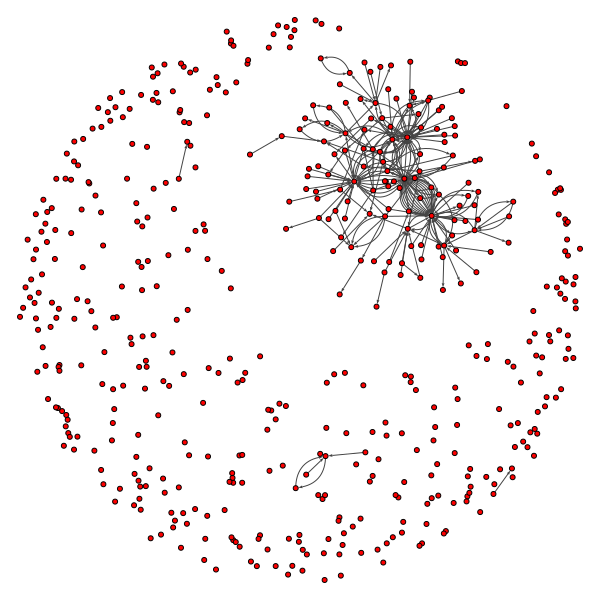

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a degree distribution plot of the graph
degrees = mygraph.degree()
# plot the degree distribution
degree_vc = pd.Series(degrees).value_counts().sort_index()

degree_dict = {}
for i in range(1, max(degrees)+1):
    if i not in degree_vc.index:
        degree_dict[i] = 0
    else:
      degree_dict[i] = degree_vc[i]

sns.barplot(x=list(degree_dict.keys()), y=list(degree_dict.values()))
plt.title('Degree distribution of the vertices in the graph')
plt.tight_layout()

### Methods for finding isolates

In [ ]:
# creating degree list with igraph package and counting the zeros
degrees = mygraph.degree()
isolates_from_igraph = degrees.count(0)
print(isolates_from_igraph)


# with sets 
all_vertices = set(vertices['author_id'])  # All the people that appear in the comment section
receivers = set(edges['destId'])  # receivers are definitely not edges
senders = set(edges[~edges['destId'].isna()]['author'])  # The senders that are not necessary receivers
print(len(senders))
isolates = all_vertices - receivers - senders
print(len(isolates))

print(isolates_from_igraph == len(isolates))

print(len(all_vertices))

384
106
384
True
514


In [ ]:
"""
Descriptives to gather:
- Total number of comments of the video
- Number mainCommentThreaths
- Number of distinct authors
- Number of handles
- Number of distinct handles
"""

# Video ID
videourl = 'https://www.youtube.com/watch?v=1pWjP9QNLcg'

# Total number of comments of the video
total_comments = edges.shape[0]

# Number mainCommentThreaths
main_comment_threads = edges[edges['kind'] == 'youtube#commentThread'].shape[0]

# Number of distinct authors
distinct_authors = vertices.shape[0]

# Number of handles
total_handles = len(edges_with_destination)

# Number of distinct handles (a.k.a. number of unique interactions)
distinct_handels = unique_edges_with_destination.shape[0]

print(f'Describing statistics of the video: {videourl}',
      f'Total number of comments: {total_comments}',
      f'Number of main comment threads: {main_comment_threads}',
      f'Number of distinct authors: {distinct_authors}',
      f'Number of handles: {total_handles}',
      f'Ratio of total handles of compared to total comments: {round(total_handles/total_comments*100, 2)}%',
      f'Number of distinct handles: {distinct_handels}',
      f'Ratio of distinct handles of compared to total comments: {round(distinct_handels/total_comments*100, 2)}%',
      f'Number of vertices without edges: {degree_vc[0]}',
      sep='\n'
      )

In [ ]:
degree_vc[0] / distinct_authors

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def word_count(s):
    # Check if the value is a string
    if isinstance(s, str):
        return len(s.split())
    else:
        return 0
    
edges['num_words'] = edges['text'].apply(word_count)
sns.kdeplot(edges['num_words'])
edges['num_words'].describe()

count    1145.000000
mean       22.670742
std        31.453830
min         1.000000
25%         8.000000
50%        15.000000
75%        25.000000
max       422.000000
Name: num_words, dtype: float64

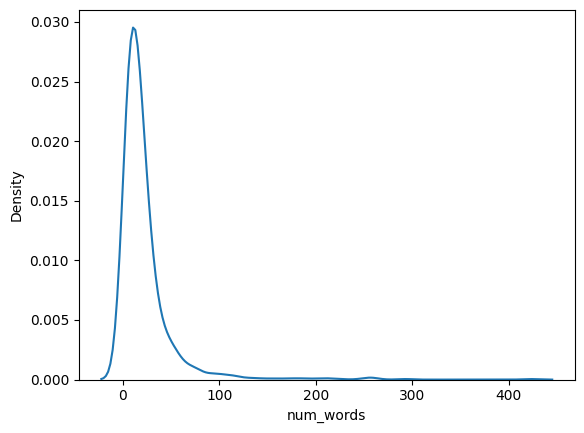

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
def word_count(s):
    # Check if the value is a string
    if isinstance(s, str):
        return len(s.split())
    else:
        return 0
    
edges['num_words'] = edges['text'].apply(word_count)
sns.kdeplot(edges['num_words'])
edges['num_words'].describe()

In [160]:
edges.columns

Index(['threath_id', 'time', 'kind', 'author_id', 'dest_scraped', 'likes',
       'num_replies', 'text', 'video_id', 'dest_id'],
      dtype='object')

In [165]:
# ik verwacht dat het gemiddeld aantal reacties per gebruiker voor de video of genders hoger is dan andere videos.
non_iso = pd.read_csv('../test_data/scraped-15.28 26-10-2023/author_ids_non_isolated.csv')

edges_filtered = edges[edges['author_id'].isin(non_iso['data'])]
new = edges_filtered[['video_id','author_id']].groupby('video_id').agg(
    {"author_id": np.count_nonzero, "author_id": pd.Series.nunique}
)

In [166]:
new

,author_id
video_id,
1pWjP9QNLcg,163
KDnSeLGnZYI,127
VfWUbQfzYTg,67
XQjBYdoiirE,91
gUryIVhXHoc,59


In [167]:
new2 = edges_filtered[['video_id','author_id']].groupby('video_id').count()

In [169]:
new2.rename(columns={'author_id': 'count'}, inplace=True)

In [170]:
new['count'] = new2['count']

In [172]:
new['comments_per_user'] = new['count'] / new['author_id']

In [174]:
new.drop(columns=['count','author_id'], inplace=True)

In [175]:
new

,comments_per_user
video_id,
1pWjP9QNLcg,4.631902
KDnSeLGnZYI,3.488189
VfWUbQfzYTg,3.029851
XQjBYdoiirE,3.956044
gUryIVhXHoc,3.525424
